# 정리

In [ ]:
from lightgbm import LGBMClassifier 
lgbm_wrapper =LGBMClassifier(n_estimatores=400, learning_rate=0.05)

evals =[(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]
from hyperopt import hp
search_space={'x': hp.quniform('x',-10,10,1),'y': hp.quniform('y',-15,15,1)}
from hyperopt import fmin, tpe, Trials
trials= Trials()
best_01=fmin(fn=object_func, space=search_space, algo=tpe.suggest, max_evals=5,
    trials=trials, rstate=np.random.default_rng(seed=0))
print('best:', best_01)
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),} 

from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax= plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [1]:
## 복습문제

In [2]:
앙상블 모델이 아닌 것은 
1. 결정트리는 아니다. 


gbm은 예측치와 실제값의 오차를 줄이는 방식으로 부스팅
배깅에서는 모든 트레이닝 세트를 다 사용한다. 

loss function 손실함수이다. 
cost function 비용함수이다.
loss= error= 오차 
odjective funtion 목적함수 

learning_rate(eta)=  학습률
n_estimators = weak learner를 사용할 것인가?
subsample = 과적합을 방지하기위하여 1보다 작은 값으로 설정가능(기본값 1 전체데이터)
early_stopping_rounds : 조기 중단 최소 오차지점에서 몇번 더 검사를 할것인가?
bootsrappinh 데이터를 나눌때 한데이터가 여러번 뽑히거나 한 데이터가 아예 안뽑힐 수도 있다.
GBM보다 실행속도가 빠른 알고리즘은(2가지) - LightGBM  ,  XGBoost
보팅과 배깅의 차이 -보팅은 모든데이터에 서로 다른 알고리즘을 갖는 것이고, 
배깅은 데이터 샘플링을 서로 다르게 하지만 같은 알고리즘을 갖는다.

앙상블 기법의 조건 
- 각각의 분류기는 상호 독립적이어야 한다. 
- 각 분류기의 오분류율은 적어도 50%보다는 낮아야 한다.

1. 틀린 것을 고르세요.

1. 앙상블 학습의 목표는 다양한 의견을 수렴하여 신뢰성 높은 예측값을 얻는 것이다.
2. 보팅은 서로 다른 알고리즘을 갖는 것이다.
3. 배깅은 데이터 샘플링을 서로 다르게 하지만 같은 알고리즘을 갖는다.
4. 보팅 방식의 대표는 랜덤 포레스트이다. 
5. 배깅 방식은 중첩을 허용한다.

답: 4


2. 틀린 것을 고르세요.

1. 하드 보팅은 다수결의 원칙과 비슷하고, 소프트 보팅은 각 확률의 평균하여 예측 결정한다.
2. 보팅 방식은 여러개의 분류기를 결합한다고 해서 예측 성능이 좋아진다. 
3. 랜덤 포레스트는 각자의 데이터 샘플링을 하고 최종적으로 소프트 보팅으로 예측 결정한다. 
4. 부트스트래핑이란 데이터를 중첩되게 샘플링하는 것이다. 
5. 랜덤 포레스트의 트리를 분할하는 피처를 참조 시 sqrt(전체)가 아닌 전체이다.  
답: 5 


3. 틀린 것을 고르세요.

1. 부스팅 방식은 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선해가는 학습 방식이다.
2. GBM은 경사하강법을 사용한다. 
3. GBM은 랜덤포레스트 보다 예측성능이 뛰어나지만 시간이 오래 걸린다는 단점이 있다. 
4. XGBoost는 랜덤포레스트보다는 속도가 느리지만 GBM에 비해 학습 속도가 빠르다. 
5. 파이썬 XGBoost와 사이킷런 XGBoost는 early_stopping_rounds를 제공하지 않는다.

답 5

XGBoost 에서 과적합 문제를 해결하기 위해 고려해야 할 사항이 아닌 것은?
a. max_depth 값을 낮춘다.
b. min_child_weight 값을 낮춘다. # 더 섬세한 차이를 하기위해서는 
c. gamma 값을 높인다. # 규제의 수준을 높인다. - 섬세하지 못함
d. eta 값을 낮춘다. # learning rate 학습률이 낮아짐

답 b d 

에러에 가중치 Boosting
뷴류기들의 레이블 값 결정확률을 모두 더하고 이를 평균해서 소프트 보팅 

머신러닝에서 여러개의 분류기로 데이터를 학습하고 각각 학습된 알고리즘 결과를 예측하고,
결합해 더 나은 결과를 도출해가는 방식 - 앙상블 

앙상블 유형 3가지 보팅, 배깅, 부스팅




SyntaxError: invalid syntax (3113583338.py, line 1)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()  #  012
 
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)
gnb_clf = GaussianNB()


In [35]:
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)

vo_clf.fit(X_train,y_train) 
pred = vo_clf.predict(X_test) 
print(accuracy_score(y_test, pred) )

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred) 

0.9666666666666667


array([[ 6,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

NameError: name 'xgb_wrapper' is not defined

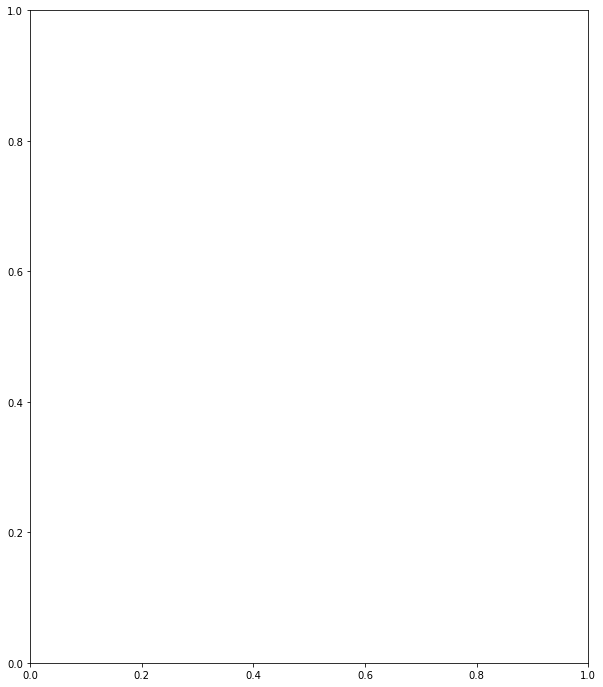

In [36]:
# 피쳐중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax) 


In [37]:
import xgboost as xgb
from xgboost import XGBClassifier

In [38]:
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2, random_state=156)
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train ,test_size=0.1, random_state=156)
# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                           eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds= xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 
get_clf_eval(y_test, w_preds, w_pred_proba)
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals=[(X_tr, y_tr),(X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
               eval_set=evals, verbose=True)
# 오차 수정하다가 성능이 50번해도 안좋아지면 stop한다. 
w50_preds= xgb_wrapper.predict(X_test)
w50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

NameError: name 'cancer' is not defined

In [11]:
## LightGBM

In [13]:
conda install -c conda-forge lightgbm

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1
  - anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29

In [39]:
import lightgbm

In [40]:
from lightgbm import LGBMClassifier 

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset=load_breast_cancer()

cancer_df =pd.DataFrame(data=dataset.data, columns= dataset.feature_names)

cancer_df['target']= dataset.target
X_features= cancer_df.iloc[:,:-1]
y_label= cancer_df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X_features, y_label, test_size=.2,
                                              random_state=156)
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train ,test_size=0.1, random_state=156)

lgbm_wrapper =LGBMClassifier(n_estimatores=400, learning_rate=0.05)

evals =[(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334

In [41]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [21]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9856


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

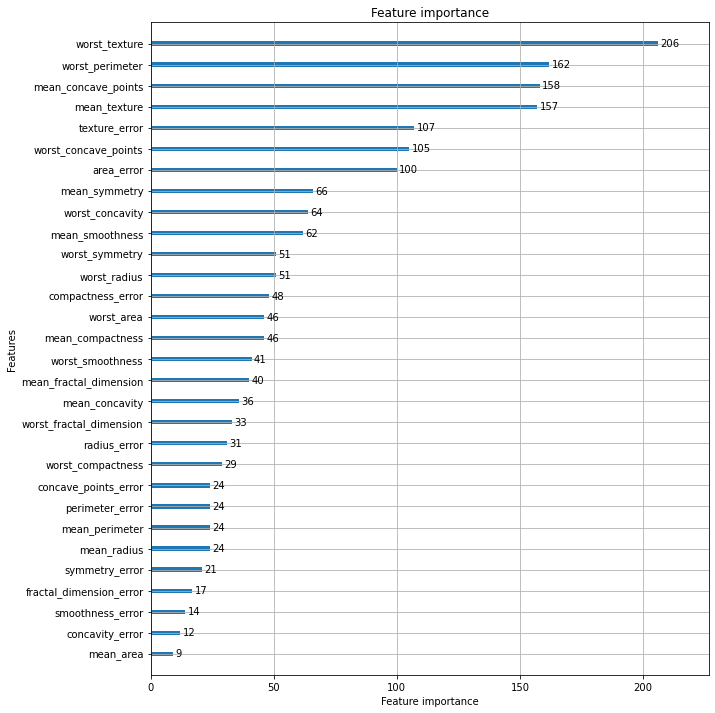

In [42]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax= plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [24]:
# 베이지안 최적화 기반 HyperOpt를 이용한 하이퍼 파라미터 튜닝

In [25]:
최적값이 최솟값을 만들어 주는 x를 찾음 

SyntaxError: invalid syntax (1946655602.py, line 1)

In [26]:
!pip install hyperopt

In [43]:
from hyperopt import hp

In [44]:
search_space={'x': hp.quniform('x',-10,10,1),'y': hp.quniform('y',-15,15,1)}

In [45]:
def object_func(search_space):
    x= search_space['x']
    y= search_space['y']
    retval = x**2-20*y
    return retval

In [46]:
from hyperopt import fmin, tpe, Trials

In [47]:
trials= Trials()

In [48]:
best_01=fmin(fn=object_func, space=search_space, algo=tpe.suggest, max_evals=5,
    trials=trials, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1232.97trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [49]:
losses=[loss_dict['loss'] for loss_dict in trials.results]

result_df=pd.DataFrame({'x':trials.vals['x'],'y':trials.vals['y'],'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0


In [50]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리  
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.1, random_state=156 ) 

In [51]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),} 

In [52]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

In [53]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best) 

100%|███████████████████████████████████████████████| 50/50 [00:11<00:00,  4.18trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [54]:
print('colsample_bytree:{0},learning_rate:{1},max_depth:{2},min_child_weight:{3}'.format(round(best['colsample_bytree'],5),
                                                                                              round(best['learning_rate'],5),
                                                                                              int(best['max_depth']),
                                                                                              int(best['min_child_weight'])))

colsample_bytree:0.54241,learning_rate:0.12601,max_depth:17,min_child_weight:2


In [55]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'],5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'],5))
evals=[(X_tr, y_tr),(X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
               eval_set=evals, verbose=True)
# 오차 수정하다가 성능이 50번해도 안좋아지면 stop한다. 
preds= xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test,preds,pred_proba)

[0]	validation_0-logloss:0.58942	validation_1-logloss:0.62048
[1]	validation_0-logloss:0.50801	validation_1-logloss:0.55913
[2]	validation_0-logloss:0.44160	validation_1-logloss:0.50928
[3]	validation_0-logloss:0.38734	validation_1-logloss:0.46815
[4]	validation_0-logloss:0.34224	validation_1-logloss:0.43913
[5]	validation_0-logloss:0.30425	validation_1-logloss:0.41570
[6]	validation_0-logloss:0.27178	validation_1-logloss:0.38953
[7]	validation_0-logloss:0.24503	validation_1-logloss:0.37317
[8]	validation_0-logloss:0.22050	validation_1-logloss:0.35628
[9]	validation_0-logloss:0.19873	validation_1-logloss:0.33798
[10]	validation_0-logloss:0.17945	validation_1-logloss:0.32463
[11]	validation_0-logloss:0.16354	validation_1-logloss:0.31384
[12]	validation_0-logloss:0.15032	validation_1-logloss:0.30607
[13]	validation_0-logloss:0.13813	validation_1-logloss:0.30143
[14]	validation_0-logloss:0.12798	validation_1-logloss:0.29513
[15]	validation_0-logloss:0.11926	validation_1-logloss:0.28891
[1

In [49]:
## 분류 실습 - 캐글 산탙데르 고객 만족 예측

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import warnings 
warnings.filterwarnings('ignore')
df =pd.read_csv("./새폴더/train.csv", encoding='latin-1')
print('dataset shape:', df.shape)
df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [65]:
df.TARGET

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [66]:
print(df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [67]:
df['TARGET'].value_counts()/len(df) # 전체 퍼센트 보여줌

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [68]:
df['var3']

0        2
1        2
2        2
3        2
4        2
        ..
76015    2
76016    2
76017    2
76018    2
76019    2
Name: var3, Length: 76020, dtype: int64

In [70]:
df['var3'].min()

-999999

In [18]:
df['var3'].replace(-999999, 2, inplace=True)

In [19]:
df= df.drop('ID', axis=1)
df

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [78]:
X=features= df.iloc[:,:-1]
y=labels=df.iloc[:,-1]

In [79]:
# X=features= df.iloc[:,1:-1]


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [80]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=.2, random_state=0)

In [82]:
y_train.value_counts()/len(y_train)

0    0.960964
1    0.039036
Name: TARGET, dtype: float64

In [83]:
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.3, random_state=0 ) 

In [3]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [32]:
xgb_clf=XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=156)
xgb_clf                    

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=156, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [88]:
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,eval_metric='auc', 
            eval_set=[(X_tr, y_tr), (X_val, y_val)])

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
preds= xgb_clf.predict(X_test)

In [90]:
accuracy_score(y_test, preds)

0.9583004472507235

In [91]:
roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])

0.8397812474965844

In [93]:
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)} 


In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list) 

In [95]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best) 

[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

KeyboardInterrupt: 

In [96]:
xgb_clf = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'],5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'],5))
evals=[(X_tr, y_tr),(X_val, y_val)]
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc',
               eval_set=evals)

[0]	validation_0-auc:0.83085	validation_1-auc:0.80869
[1]	validation_0-auc:0.84648	validation_1-auc:0.81221
[2]	validation_0-auc:0.85291	validation_1-auc:0.81391
[3]	validation_0-auc:0.85611	validation_1-auc:0.81267
[4]	validation_0-auc:0.86631	validation_1-auc:0.81534
[5]	validation_0-auc:0.87250	validation_1-auc:0.81584
[6]	validation_0-auc:0.88085	validation_1-auc:0.81903
[7]	validation_0-auc:0.88519	validation_1-auc:0.81867
[8]	validation_0-auc:0.88793	validation_1-auc:0.81876
[9]	validation_0-auc:0.89081	validation_1-auc:0.81892
[10]	validation_0-auc:0.89294	validation_1-auc:0.81713
[11]	validation_0-auc:0.89655	validation_1-auc:0.81540
[12]	validation_0-auc:0.90028	validation_1-auc:0.81716
[13]	validation_0-auc:0.90589	validation_1-auc:0.81846
[14]	validation_0-auc:0.90861	validation_1-auc:0.82056
[15]	validation_0-auc:0.91243	validation_1-auc:0.81898
[16]	validation_0-auc:0.91543	validation_1-auc:0.82023
[17]	validation_0-auc:0.92297	validation_1-auc:0.82063
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.54241,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.12601, max_delta_step=0, max_depth=17,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [97]:
xgb_roc_score =roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])

In [98]:
xgb_roc_score

0.8348508451530628

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

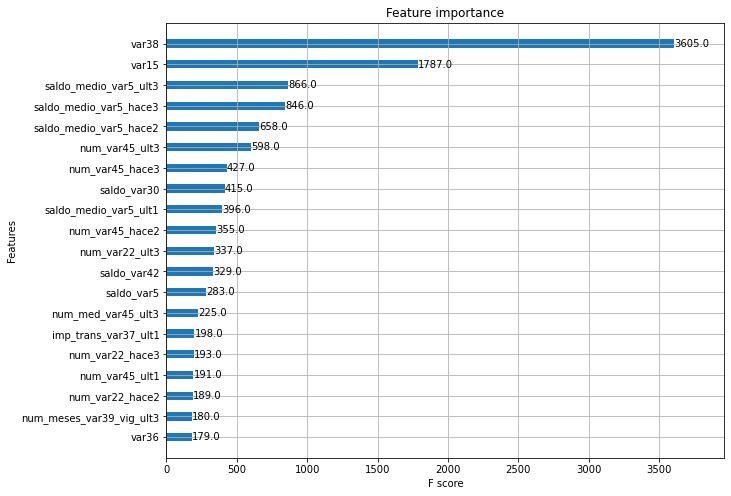

In [102]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax= plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [ ]:
##lightGBM, HyperOpt

In [ ]:
from lightgbm import LGBMClassifier

In [5]:
from lightgbm import LGBMClassifier

In [20]:
df.sample(frac=0.001) # 1/10으로 줄임 

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
57385,2,23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69681.960000,0
52662,2,34,0.0,11.7,226.35,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148739.100000,0
66570,2,26,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39765.720000,0
47621,2,26,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35959.410000,0
43189,2,22,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52897.680000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,2,29,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
20556,2,40,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117020.220000,0
16096,2,48,18000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105375.330000,0
61204,2,59,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139371.690000,0


In [21]:
X=features= df.iloc[:,:-1]
y=labels=df.iloc[:,-1]

In [56]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=.2, random_state=0)
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.3, random_state=0 ) 

In [23]:
lgbm_clf =LGBMClassifier(n_estimators=500)
eval_set=[(X_tr, y_tr),(X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr,early_stopping_rounds=20, eval_metric='auc', eval_set=eval_set)
lgbm_roc_score= roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
lgbm_roc_score

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc

0.8384286453518205

In [24]:
from hyperopt import hp

lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 60, 100, 1),
                    'subsample': hp.uniform('subsample', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)} 

In [25]:
def objective_func(search_space):
        lgbm_clf = LGBMClassifier(n_estimators=400,
                        num_leaves=int(search_space['num_leaves']),
                        max_depth=int(search_space['max_depth']),
                        min_child_weight=int(search_space['min_child_weight']),
                        subsample=search_space['subsample'],
                        learning_rate=search_space['learning_rate'])
        roc_auc_list= []

        # 3개 k-fold방식 적용 
        kf = KFold(n_splits=3)
        # X_train을 다시 학습과 검증용 데이터로 분리
        for tr_index, val_index in kf.split(X_train):
            # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
            X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
            X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
            # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
            lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                       , eval_set=[(X_tr, y_tr), (X_val, y_val)])

            # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
            score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
            roc_auc_list.append(score)

        # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
        # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
        return -1 * np.mean(roc_auc_list) 


In [28]:
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=1, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best) 

[1]	training's auc: 0.82174	training's binary_logloss: 0.162826	valid_1's auc: 0.802429	valid_1's binary_logloss: 0.163847
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.826234	training's binary_logloss: 0.161252	valid_1's auc: 0.807122	valid_1's binary_logloss: 0.162413
[3]	training's auc: 0.825382	training's binary_logloss: 0.159831	valid_1's auc: 0.806778	valid_1's binary_logloss: 0.161123
[4]	training's auc: 0.827407	training's binary_logloss: 0.158506	valid_1's auc: 0.808767	valid_1's binary_logloss: 0.159913
[5]	training's auc: 0.826996	training's binary_logloss: 0.157291	valid_1's auc: 0.8085	valid_1's binary_logloss: 0.15881
[6]	training's auc: 0.827723	training's binary_logloss: 0.156162	valid_1's auc: 0.808377	valid_1's binary_logloss: 0.157794
[7]	training's auc: 0.827996	training's binary_logloss: 0.155137	valid_1's auc: 0.808674	valid_1's binary_logloss: 0.156877
[8]	training's a

In [29]:
lgbm_clf = LGBMClassifier(n_estimators=500,
                          num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_weight=int(best['min_child_weight']),
                          subsample=round(best['subsample'],5),
                          learning_rate=round(best['learning_rate'],5))
                           
                          

In [30]:
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

[1]	training's auc: 0.822268	training's binary_logloss: 0.157575	valid_1's auc: 0.812104	valid_1's binary_logloss: 0.158877
Training until validation scores don't improve for 50 rounds
[2]	training's auc: 0.825637	training's binary_logloss: 0.153048	valid_1's auc: 0.812405	valid_1's binary_logloss: 0.154586
[3]	training's auc: 0.831744	training's binary_logloss: 0.149605	valid_1's auc: 0.818182	valid_1's binary_logloss: 0.151338
[4]	training's auc: 0.834074	training's binary_logloss: 0.146907	valid_1's auc: 0.820477	valid_1's binary_logloss: 0.148901
[5]	training's auc: 0.8356	training's binary_logloss: 0.144768	valid_1's auc: 0.82168	valid_1's binary_logloss: 0.146944
[6]	training's auc: 0.836063	training's binary_logloss: 0.142968	valid_1's auc: 0.822681	valid_1's binary_logloss: 0.145301
[7]	training's auc: 0.83693	training's binary_logloss: 0.14149	valid_1's auc: 0.823887	valid_1's binary_logloss: 0.143891
[8]	training's auc: 0.837228	training's binary_logloss: 0.14027	valid_1's au

LGBMClassifier(learning_rate=0.10001, max_depth=114, min_child_weight=67,
               n_estimators=500, num_leaves=58, subsample=0.8938)

In [57]:
roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])

NotFittedError: need to call fit or load_model beforehand

In [ ]:
 booster [default = 'gbtree'] 

        gbtree : 트리 기반 모델

        gblinear : 선형 모델

 

▶ silent [default = 0]

        0 : 동작 메세지 프린트 함

        1 : 동작 메세지 프린트 안함 

 

▶ nthread [default = 전체 다 사용]

 

 

- Booster Parameters ( 모델의 조건 설정 )
▶ n_estimators [default = 100] : 나무의 개수 (=num_boost_round [default = 10] : 파이썬 래퍼에서 적용)

 

▶ early_stopping_rounds 

        최대한 몇 개의 트리를 완성해볼 것인지 

        valid loss에 더이상 진전이 없으면 멈춤

        과적합을 방지할 수 있음, n_estimators 가 높을때 주로 사용.

 

▶ learning_rate [default = 0.1] (=eta [default = 0.3] : 파이썬 래퍼에서 적용)

        학습 단계별로 가중치를 얼만큼 사용할지 결정/ 이전의 결과를 얼마나 반영할건지

        낮은 eta -> 낮은 가중치 -> 다음 단계의 결과물 적게 반영 -> 보수적

        일반적으로 0.01 ~ 0.2

        높은 값으로 다른 파라미터 조절하여 결정한 후, 낮춰서 최적의 파라미 결정

        * gradient boost에서는 기울기의 의미, 작으면 꼼꼼히 내려가고 크면 급하게 내려감

 

▶ min_child_weight [default = 1]

        child 에서 필요한 모든 관측치에 대한 가중치의 최소 합

        이 값보다 샘플 수가 작으면 leaf node가 되는 것

        너무 크면 under-fitting 될 수 있음

        CV로 조절해야함

 

▶ max_depth [default = 6]

        트리의 최대 깊이

        일반적으로 3 ~ 10  

        CV로 조절해야함

 

▶ gamma [default = 0]

        트리에서 추가적으로 가지를 나눌지를 결정할 최소 손실 감소 값

        값이 클수록 과적합 감소 효과

 

▶ subsample [default = 1] (=sub_sample : 파이썬 래퍼에서 적용)

        각 트리마다 데이터 샘플링 비율

        over-fitting 방지

        일반적으로 0.5 ~ 1

 

▶ colsample_bytree [default = 1]

        각 트리마다 feature 샘플링 비율

        일반적으로 0.5 ~ 1

 

▶ reg_lambda [default = 1] (=lambda : 파이썬 래퍼에서 적용)

        L2 regularization(ex. 릿지) 가중치

        클수록 보수적

 

▶ reg_alpha [default = 0] (=alpha : 파이썬 래퍼에서 적용)

        L1 regularization(ex. 라쏘) 가중치

        클수록 보수적

        특성이 매우 많은때 사용해볼만 함

 

▶ scale_pos_weight [default = 1]

        데이터가 불균형할때 사용, 0보다 큰 값

        보통 값을 음성 데이터 수/ 양성 데이터 수 값으로 함

 

 

- Learning Task Parameters ( 모델의 목표 및 계산 방법 설정 )
▶ objective [default = reg:linear] (목적 함수)

        binary:logistic :이진 분류를 위한 로지스틱 회귀, 클래스가 아닌 예측된 확률 반환

        multi:softmax : softmax를 사용한 다중 클래스 분류, 확률이 아닌 예측된 클래스 반환

        multi:softprob : softmax와 같지만 각 클래스에 대한 예상 확률 반환

 

▶ eval_metric [목적 함수에 따라 디폴트 값이 다름(회귀-rmse / 분류-error)]

        rmse : root mean square error

        mae : mean absolute error

        logloss : negative log-likelihood

        error : binary classificaion error rate (임계값 0.5)

        merror : multiclass classification error rate

        mlogloss : multiclass logloss

        auc : area under the curve

 

▶ seed [default = 0]

        시드값 고정 (나중에 재현할때 같은 값을 출력하기 위해)